# Stroke Prediction Dataset

11 clinical features for predicting stroke events

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

# Dataset Feature Overview

1) id: unique identifier
2) gender: "Male", "Female" or "Other"\
3) age: age of the patient\
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension\
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease\
6) ever_married: "No" or "Yes"\
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"\
8) Residence_type: "Rural" or "Urban"\
9) avg_glucose_level: average glucose level in blood\
10) bmi: body mass index\
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*\
12) stroke: 1 if the patient had a stroke or 0 if not\
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score

## Reading DataSet

In [2]:
# Reading Data
data = pd.read_csv("/content/healthcare-dataset-stroke-data.csv")
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4755,12786,Female,59.0,0,0,Yes,Private,Urban,83.62,34.2,Unknown,0
569,39399,Female,32.0,0,0,No,Self-employed,Urban,65.30,40.4,never smoked,0
4500,13598,Male,60.0,0,0,Yes,Self-employed,Urban,227.23,40.0,formerly smoked,0
3495,23514,Female,61.0,0,0,Yes,Self-employed,Urban,75.46,29.3,formerly smoked,0
1608,9011,Male,59.0,0,0,Yes,Private,Urban,93.58,25.1,smokes,0
857,14807,Female,40.0,0,0,Yes,Private,Urban,75.87,30.3,never smoked,0
606,7446,Male,44.0,0,0,Yes,Private,Urban,83.51,31.2,never smoked,0
3412,26604,Female,18.0,0,0,No,Private,Rural,107.82,26.0,never smoked,0
3733,44001,Female,39.0,0,0,Yes,Private,Urban,55.28,31.5,Unknown,0
793,69427,Female,29.0,0,0,No,Private,Urban,101.28,22.7,never smoked,0


In [4]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

## Exploratory Data Analysis (EDA)

EDA (Exploratory Data Analysis) is a process that involves understanding the data by calculating statistics and creating visualizations such as charts and figures. The purpose of EDA is to discover patterns, relationships, and anomalies in the data that could have an impact on our analysis.

In [5]:
data.shape

(5110, 12)

In [6]:
# Column Types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [7]:
# Descriptive statistics include those that summarize the central tendency, dispersion and shape of a dataset’s distribution
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,5110.0,NaN,NaN,NaN,36517.829354,21161.721625,67.0,17741.25,36932.0,54682.0,72940.0
gender,5110,3,Female,2994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,5110.0,NaN,NaN,NaN,43.226614,22.612647,0.08,25.0,45.0,61.0,82.0
hypertension,5110.0,NaN,NaN,NaN,0.097456,0.296607,0.0,0.0,0.0,0.0,1.0
heart_disease,5110.0,NaN,NaN,NaN,0.054012,0.226063,0.0,0.0,0.0,0.0,1.0
ever_married,5110,2,Yes,3353,NaN,NaN,NaN,NaN,NaN,NaN,NaN
work_type,5110,5,Private,2925,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Residence_type,5110,2,Urban,2596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
avg_glucose_level,5110.0,NaN,NaN,NaN,106.147677,45.28356,55.12,77.245,91.885,114.09,271.74
bmi,4909.0,NaN,NaN,NaN,28.893237,7.854067,10.3,23.5,28.1,33.1,97.6


In [8]:
# To check the number of unique values in each column
num_unique = data.nunique()
num_unique

id                   5110
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3979
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [9]:
# count the number of duplicate rows
data.duplicated().sum()

0

In [10]:
# count the number of missing values (NaN values) in each column.
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

## Feature Engineering And Visualization

### Neumerical Features

#### Handle Neumerical Features

In [11]:
# drop id column
data = data.drop('id', axis=1)

In [12]:
#segrate the feature
numerical_features = [feature for feature in data.columns if data[feature].dtype!='O']
numerical_features

['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

In [13]:
# Create an instance of the SimpleImputer class
imputer = SimpleImputer(strategy='mean')

# Iterate over the numerical features and impute missing values with the mean
for feature in numerical_features:
    imputer.fit(data[[feature]])
    data[feature] = imputer.transform(data[[feature]])

In [14]:
data[numerical_features]

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
0,67.0,0.0,1.0,228.69,36.600000,1.0
1,61.0,0.0,0.0,202.21,28.893237,1.0
2,80.0,0.0,1.0,105.92,32.500000,1.0
3,49.0,0.0,0.0,171.23,34.400000,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0
...,...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,28.893237,0.0
5106,81.0,0.0,0.0,125.20,40.000000,0.0
5107,35.0,0.0,0.0,82.99,30.600000,0.0
5108,51.0,0.0,0.0,166.29,25.600000,0.0


In [15]:
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

#### Visualization Numerical Features

<ipython-input-16-edb75c7ec998>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_features[i]],shade=True, color='r')
<ipython-input-16-edb75c7ec998>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_features[i]],shade=True, color='r')
<ipython-input-16-edb75c7ec998>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_features[i]],shade=True, color='r')
<ipython-input-16-edb75c7ec998>:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=data[numerical_feat

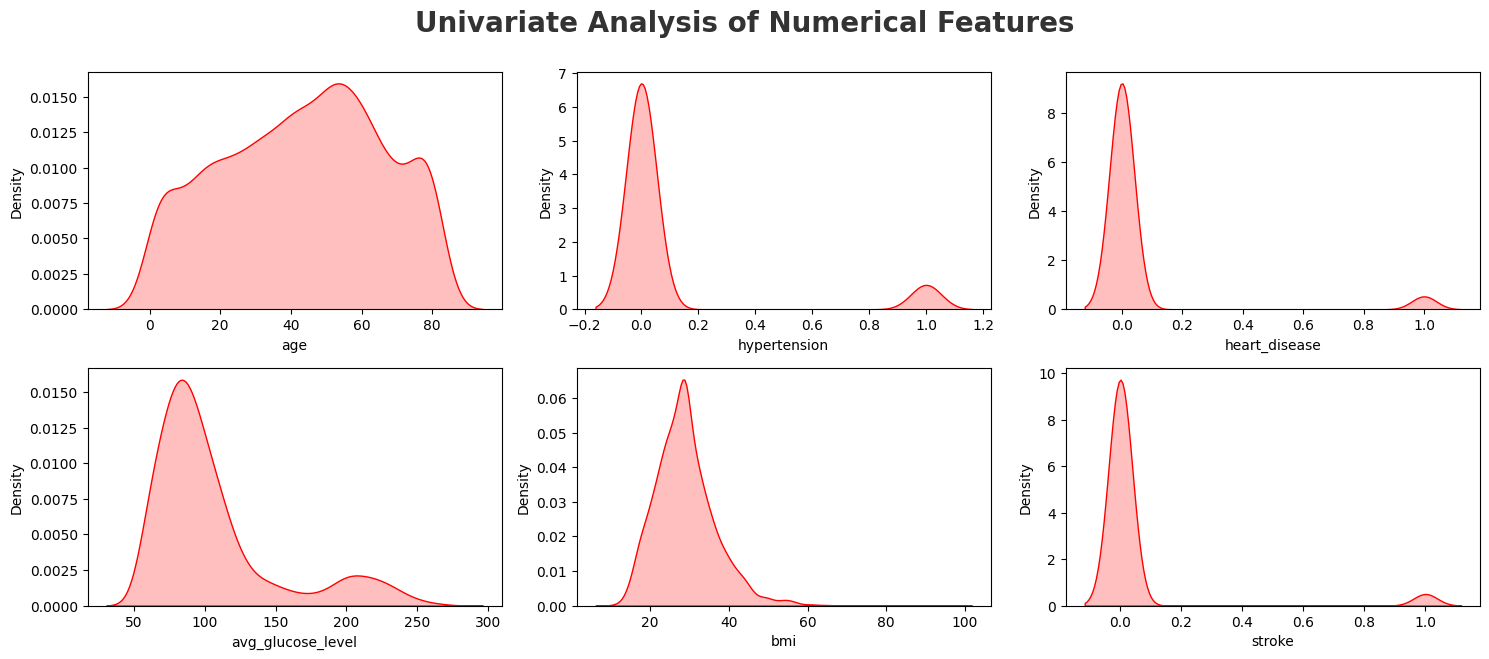

In [16]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numerical_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numerical_features[i]],shade=True, color='r')
    plt.xlabel(numerical_features[i])
    plt.tight_layout()

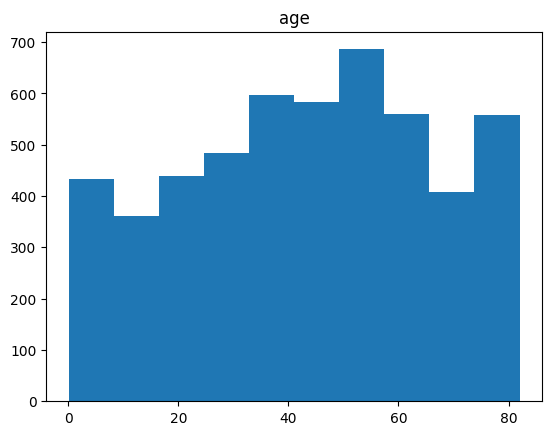

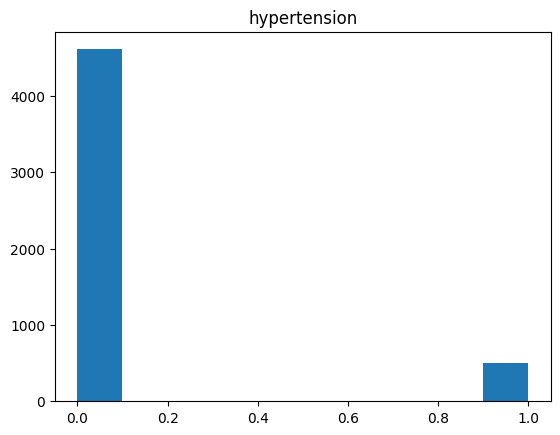

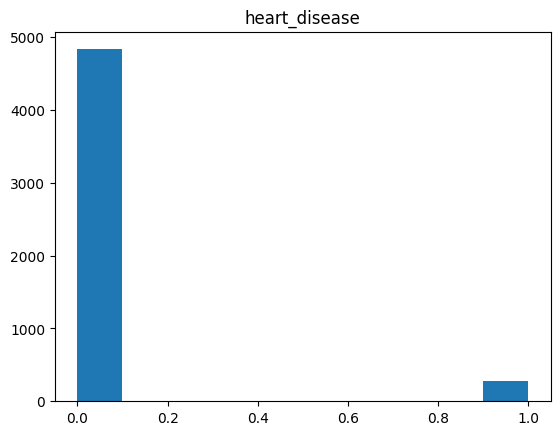

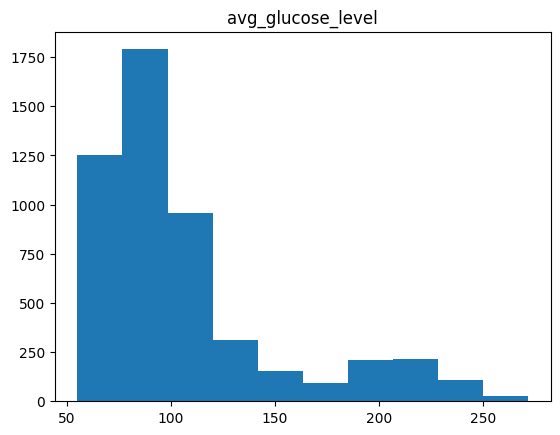

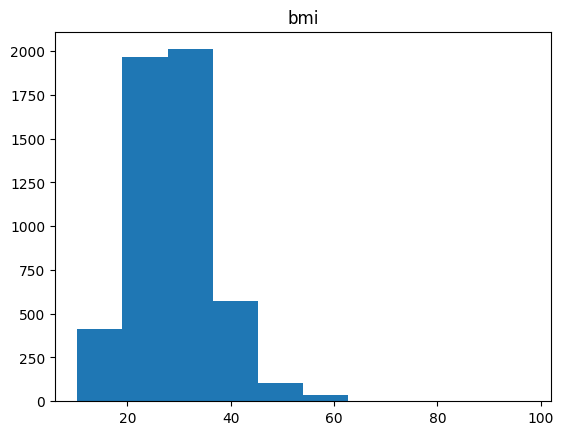

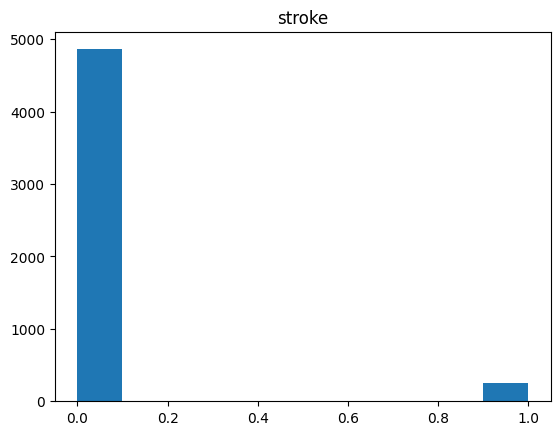

In [17]:
# histogram
for col in numerical_features:
    # Check if the column is numeric
    if pd.api.types.is_numeric_dtype(data[col]):
        # If the column is numeric, create a histogram using matplotlib
        plt.hist(data[col])
        plt.title(col)
        plt.show()

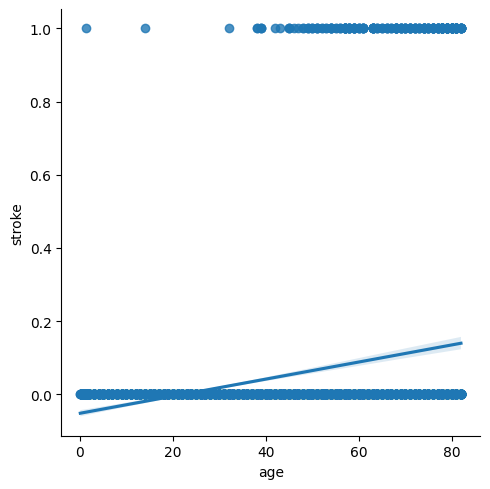

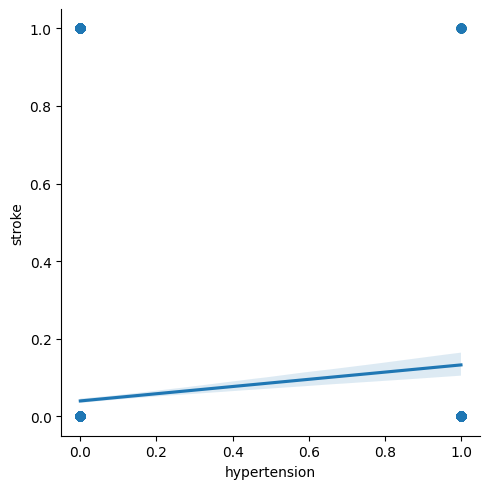

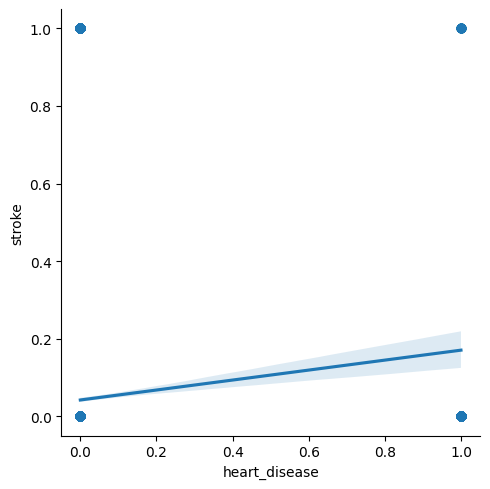

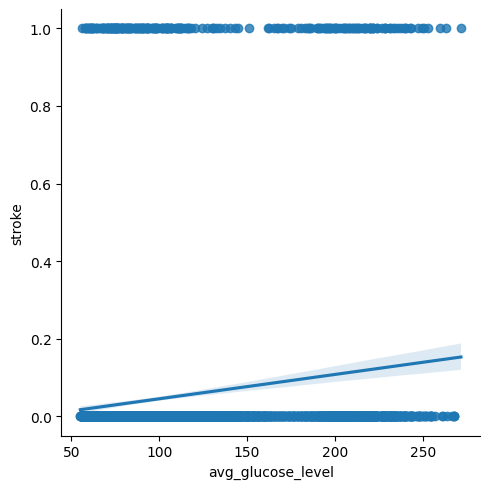

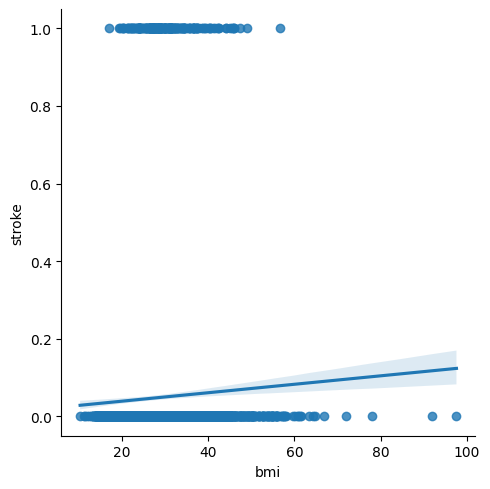

In [18]:
# lmplot, which is a function in the Seaborn library used to create linear regression plots.
# A linear regression plot is a visualization of the relationship between two variables,
# with a linear regression line fitted to the data. It can be useful for exploring the correlation between two variables and for making predictions.
for feature in numerical_features[:-1]:
    sns.lmplot(x=feature, y='stroke', data=data[numerical_features])

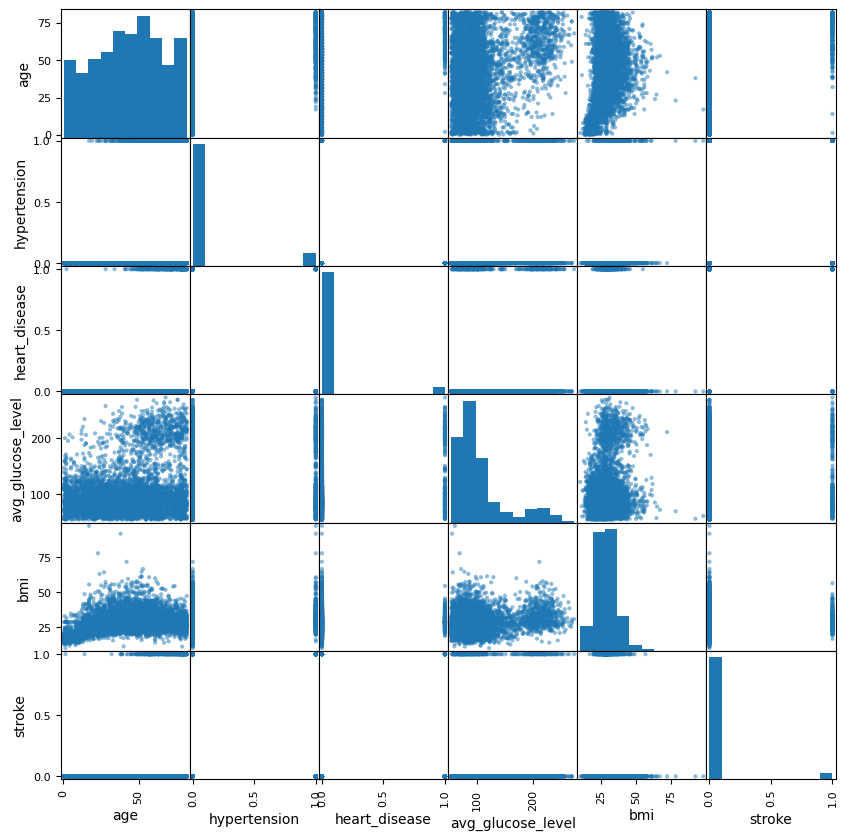

In [19]:
pd.plotting.scatter_matrix(data[numerical_features], figsize=(10, 10))
plt.show()

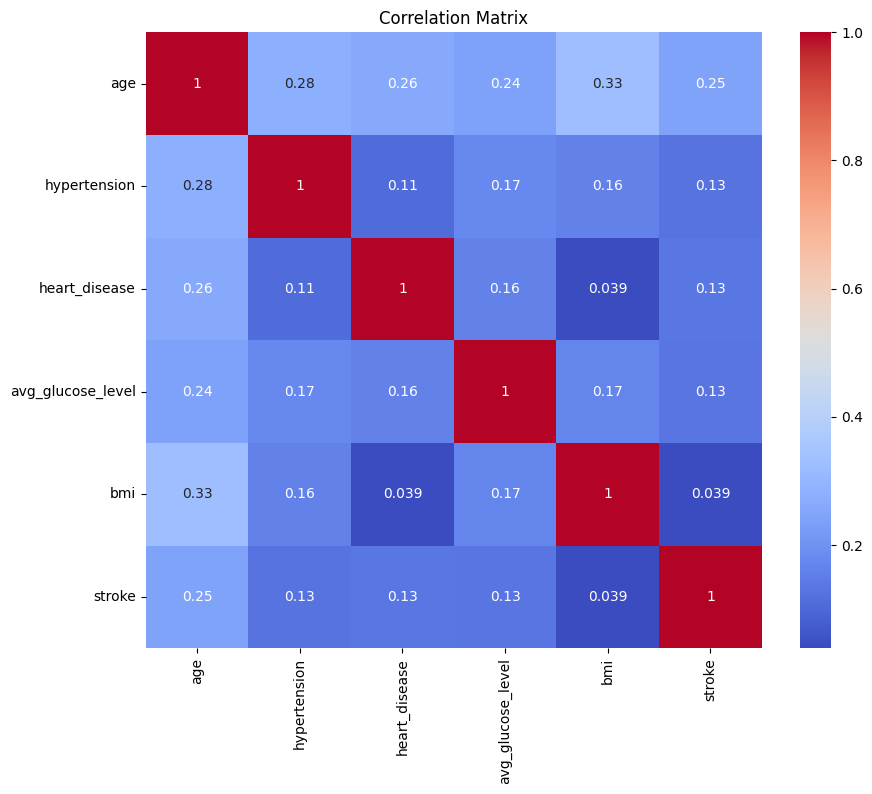

In [20]:
# Calculate the correlation matrix
correlation_matrix = data[numerical_features].corr()

# Create a correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)

# Set plot title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

### Categorical Features

#### Visualization Categorical Features

In [21]:
Categorical_features = [feature for feature in data.columns if data[feature].dtype =='O']
Categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

<ipython-input-22-1ef73cd2c6d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[category[i]], palette="Set2")
<ipython-input-22-1ef73cd2c6d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[category[i]], palette="Set2")
<ipython-input-22-1ef73cd2c6d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[category[i]], palette="Set2")
<ipython-input-22-1ef73cd2c6d5>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `l

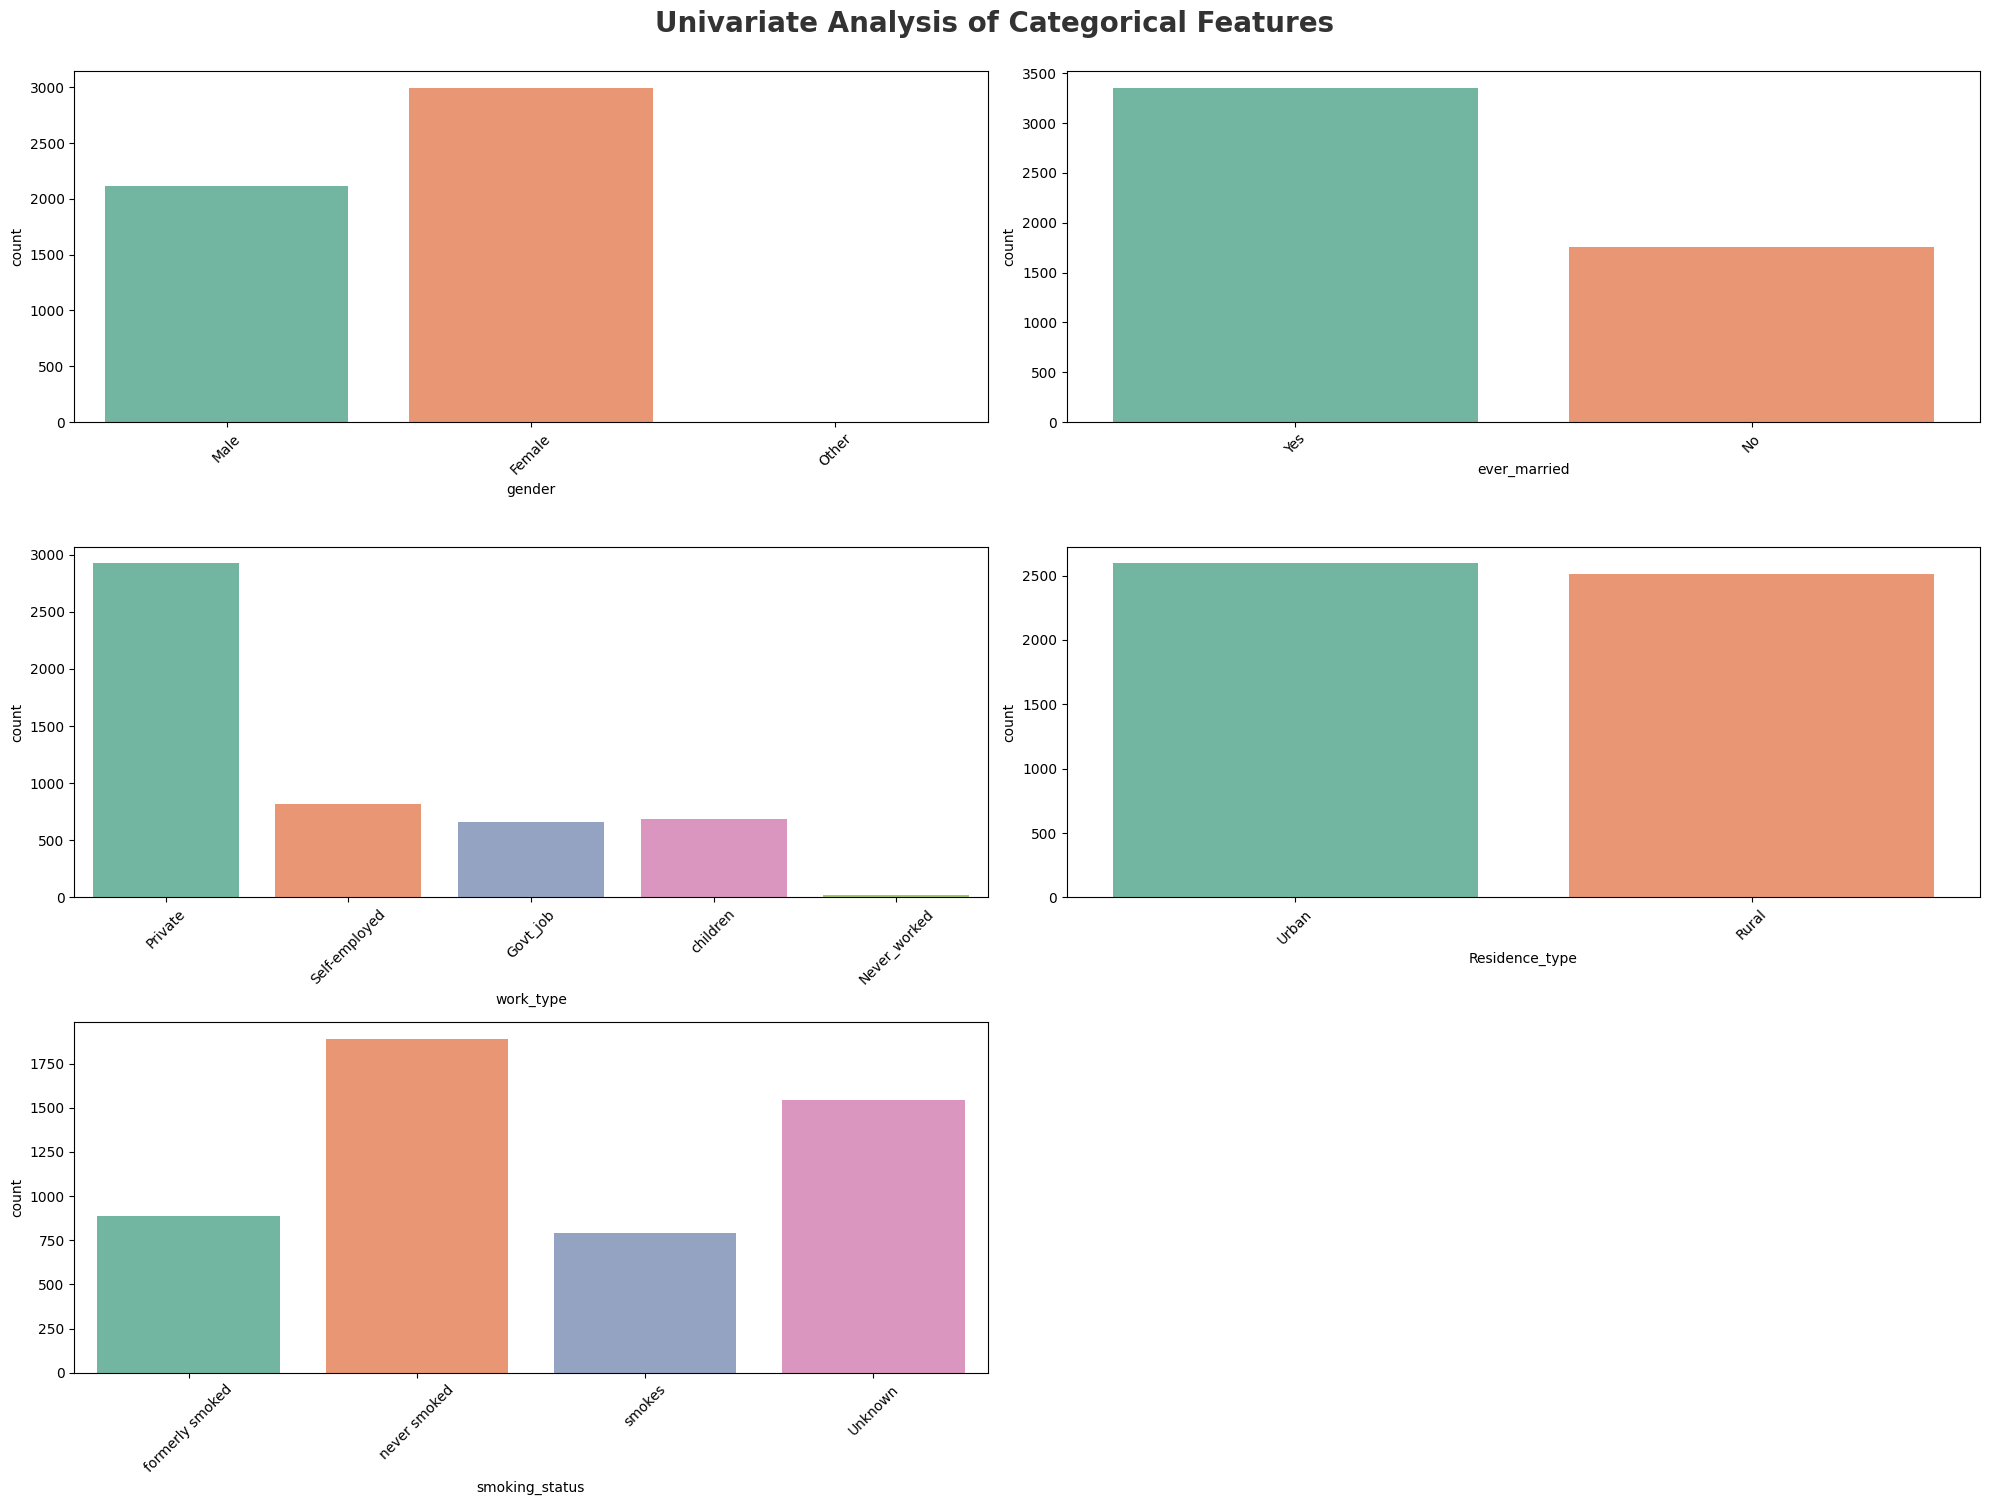

In [22]:
#bivariate
# Set the figure size and title
plt.figure(figsize=(20, 15))
plt.suptitle('Univariate Analysis of Categorical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

# Define the categorical features
category = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Create subplots for each categorical feature
for i in range(len(category)):
    plt.subplot(3, 2, i+1)  # Adjusted the subplot parameters to (3, 2, ...)
    sns.countplot(x=data[category[i]], palette="Set2")
    plt.xlabel(category[i])
    plt.xticks(rotation=45)
    plt.tight_layout()

# Show the plots
plt.show()

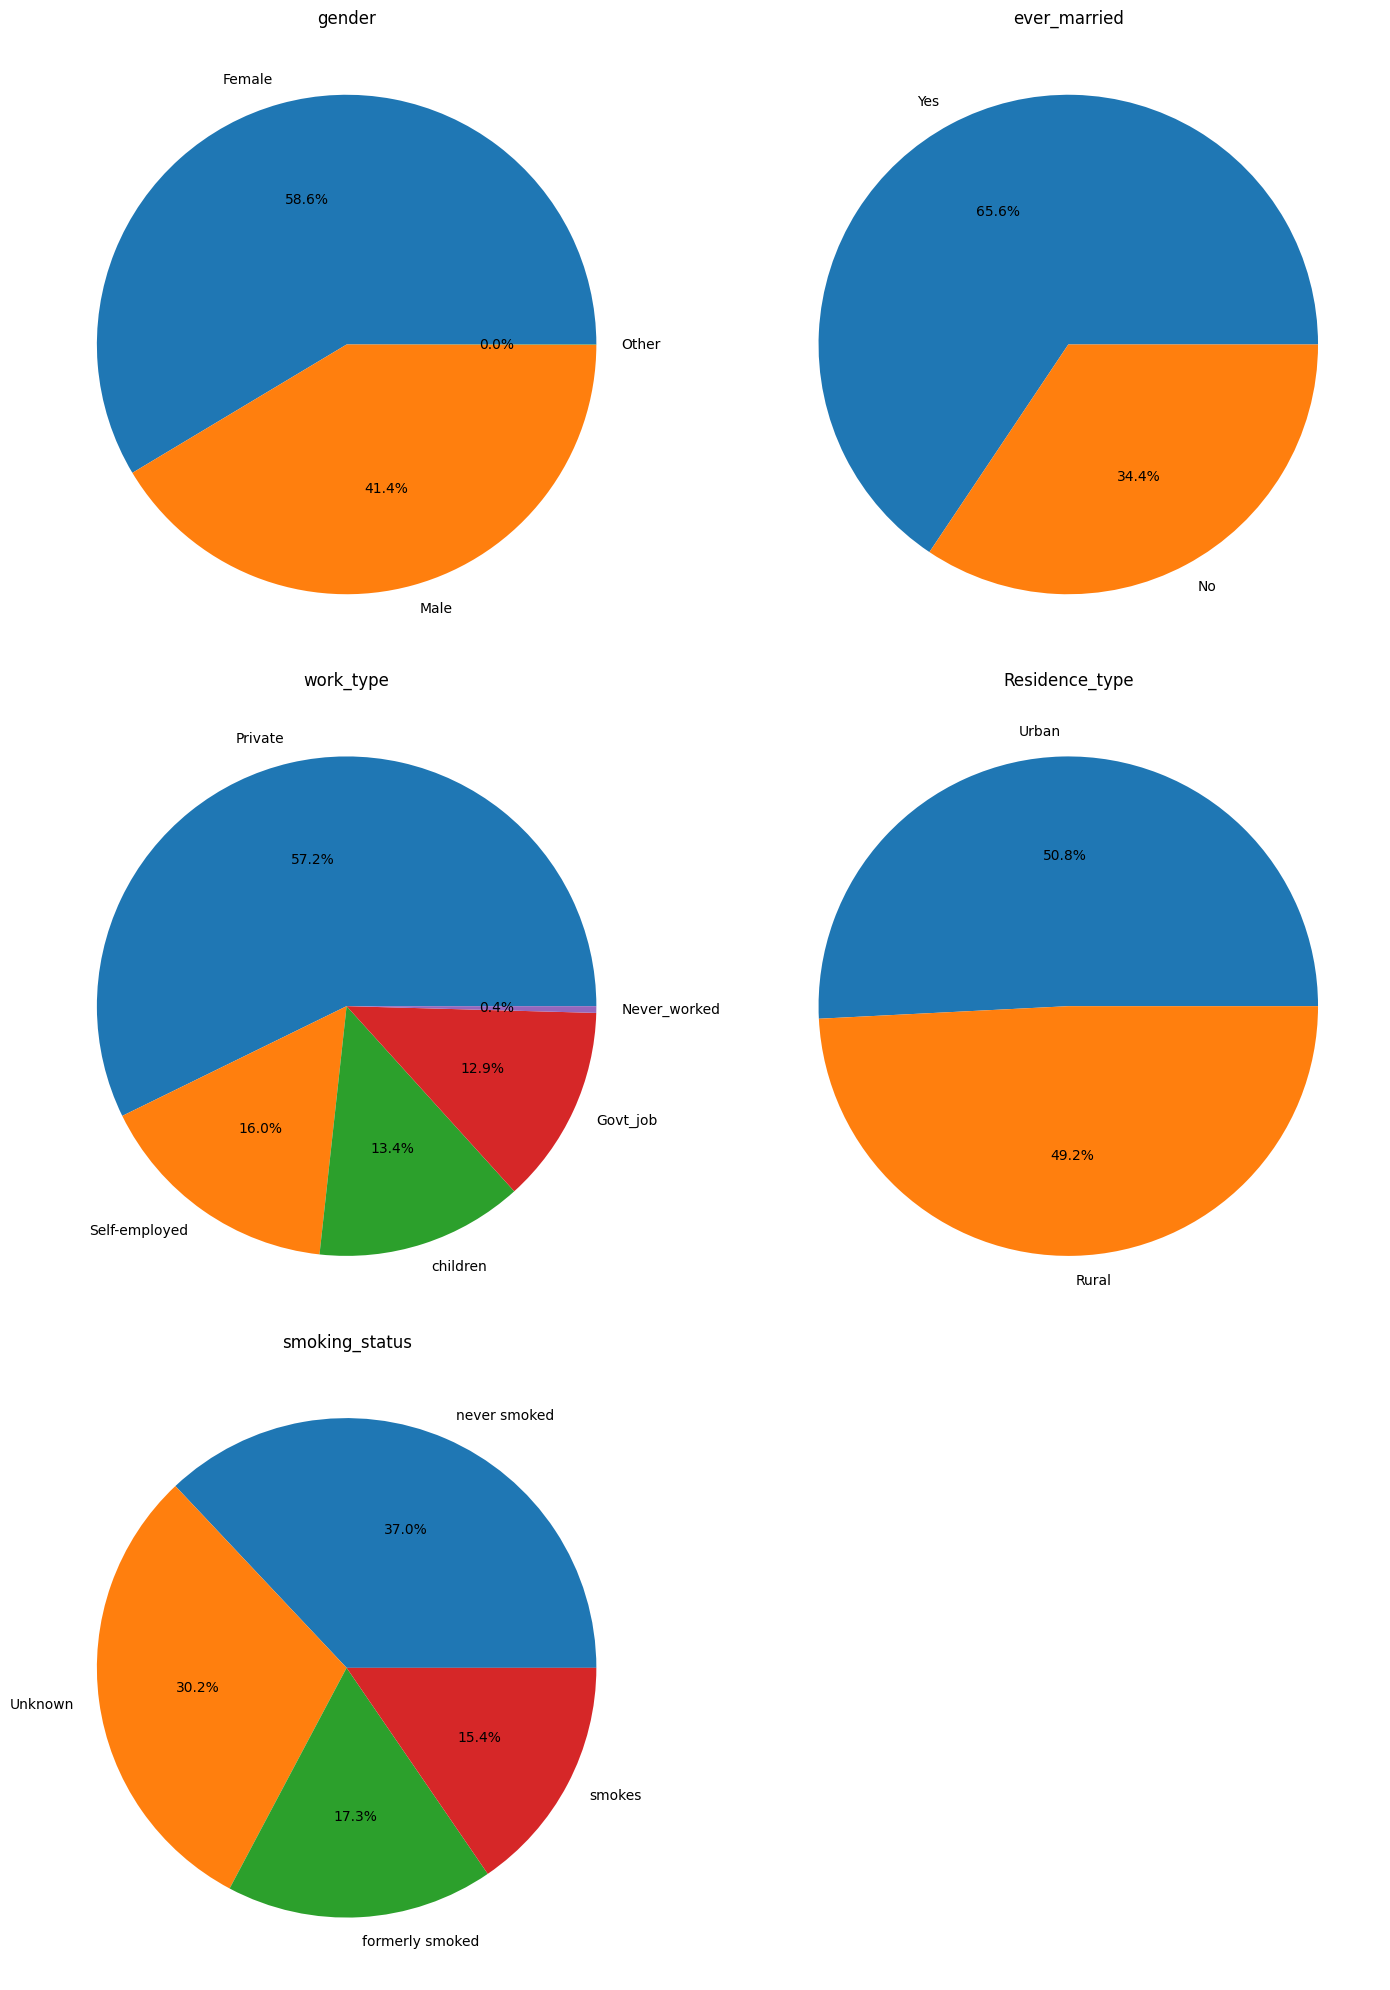

In [23]:
plt.figure(figsize=(15, 20))

# Create pie charts for each categorical feature
for i, feature in enumerate(category):
    plt.subplot(3, 2, i+1)
    data[feature].value_counts().plot.pie(autopct='%1.1f%%')
    plt.title(feature)
    plt.ylabel('')
    plt.tight_layout()

# Show the plots
plt.show()

#### Handle Categorical Features

In [24]:
categorical_features = [feature for feature in data.columns if data[feature].dtype =='O']
categorical_features

['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

In [25]:
data[categorical_features]

,gender,ever_married,work_type,Residence_type,smoking_status
0,Male,Yes,Private,Urban,formerly smoked
1,Female,Yes,Self-employed,Rural,never smoked
2,Male,Yes,Private,Rural,never smoked
3,Female,Yes,Private,Urban,smokes
4,Female,Yes,Self-employed,Rural,never smoked
...,...,...,...,...,...
5105,Female,Yes,Private,Urban,never smoked
5106,Female,Yes,Self-employed,Urban,never smoked
5107,Female,Yes,Self-employed,Rural,never smoked
5108,Male,Yes,Private,Rural,formerly smoked


In [26]:
# Initialize the OneHotEncoder object
encoder = OneHotEncoder()

# Fit and transform the data using the encoder
encoded_data = encoder.fit_transform(data[['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']])

# Get the feature names from the encoder
feature_names = encoder.get_feature_names_out(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'])

# Convert the encoded data into a DataFrame
encoded_df = pd.DataFrame(encoded_data.toarray(), columns=feature_names)

# Concatenate the encoded DataFrame with the original data
final_data = pd.concat([data, encoded_df], axis=1)

In [27]:
# Drop the original columns
original_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
final_data = final_data.drop(original_columns, axis=1)

In [28]:
final_data

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1.0,0.0,83.75,28.893237,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5106,81.0,0.0,0.0,125.20,40.000000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5107,35.0,0.0,0.0,82.99,30.600000,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5108,51.0,0.0,0.0,166.29,25.600000,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [29]:
final_data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0.0,1.0,228.69,36.600000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,61.0,0.0,0.0,202.21,28.893237,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,80.0,0.0,1.0,105.92,32.500000,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,49.0,0.0,0.0,171.23,34.400000,1.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,79.0,1.0,0.0,174.12,24.000000,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [30]:
final_data.dtypes

age                               float64
hypertension                      float64
heart_disease                     float64
avg_glucose_level                 float64
bmi                               float64
stroke                            float64
gender_Female                     float64
gender_Male                       float64
gender_Other                      float64
ever_married_No                   float64
ever_married_Yes                  float64
work_type_Govt_job                float64
work_type_Never_worked            float64
work_type_Private                 float64
work_type_Self-employed           float64
work_type_children                float64
Residence_type_Rural              float64
Residence_type_Urban              float64
smoking_status_Unknown            float64
smoking_status_formerly smoked    float64
smoking_status_never smoked       float64
smoking_status_smokes             float64
dtype: object

In [31]:
final_data.shape

(5110, 22)

## Divide the dataset

#### Divide the dataset into independent and dependent

In [32]:
X = final_data.drop('stroke', axis=1)  # drop the target variable column from the input features
y = final_data['stroke']

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Models

### Logistic Regression Model

In [34]:
# Create a logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [35]:
# Train the model on the training data
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [36]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

In [37]:
# Calculate accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [38]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Decision Tree Model

#### criterion = Entropy

In [39]:
# perform training Entropy
from sklearn.tree import DecisionTreeClassifier                             # import the classifier
classifier =DecisionTreeClassifier(criterion="entropy", random_state=100)     # create a classifier object
classifier.fit(X_train, y_train)                                              # fit the classifier with X and Y data or

DecisionTreeClassifier(criterion='entropy', random_state=100)

In [40]:
#Predict the response for test dataset
y_pred= classifier.predict(X_test)

In [41]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9031311154598826


In [42]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[914  46]
 [ 53   9]]
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95       960
         1.0       0.16      0.15      0.15        62

    accuracy                           0.90      1022
   macro avg       0.55      0.55      0.55      1022
weighted avg       0.90      0.90      0.90      1022



#### criterion = Gini impurity

In [43]:
# Train a decision tree classifier with Gini impurity
tree_clf = DecisionTreeClassifier(criterion="gini", max_depth=2, random_state=42)

In [44]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [45]:
# Make predictions on the test set
y_pred = tree_clf.predict(X_test)

In [46]:
# Calculate accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9393346379647749


In [47]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[960   0]
 [ 62   0]]
              precision    recall  f1-score   support

         0.0       0.94      1.00      0.97       960
         1.0       0.00      0.00      0.00        62

    accuracy                           0.94      1022
   macro avg       0.47      0.50      0.48      1022
weighted avg       0.88      0.94      0.91      1022



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Random Forest Model

In [48]:
from sklearn.ensemble import RandomForestClassifier
# Create random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100)

In [49]:
# Fit model to training data
rf.fit(X_train, y_train)

RandomForestClassifier()

In [50]:
# Make predictions on test data
y_pred = rf.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9383561643835616


### k-Nearest Neighbors

In [52]:
from sklearn.neighbors import KNeighborsClassifier
# Create an instance of the KNeighborsClassifier with k=3
knn = KNeighborsClassifier(n_neighbors=3)

In [53]:
# Fit the classifier to the training data
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [54]:
# Make predictions on the test data
y_pred = knn.predict(X_test)

In [55]:
# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9354207436399217
